# Project 3
# Henry Pham
# Department of Data Science, Bellevue University
# DSC680-T301
# Professor: Amirfarrokh Iranitalab
# Assignment Due Date: 2024-03-02

In [1]:
#----Project 3----

# Introduction

In [2]:
# In the world of finance, predicting stock market performance is a perpetual challenge. 
# Investors, businesses, and policymakers rely on accurate forecasts to make critical decisions and 
# navigate the complexities of financial markets. The performance of stock markets is not isolated; 
# it is influenced by a multitude of macroeconomic factors that shape the overall economic landscape.

# In this project, I embark on a journey to develop a predictive model that goes beyond traditional technical and fundamental analysis. 
# My focus is on harnessing the power of macroeconomic indicators, including inflation rates, durable goods orders,
# Consumer Price Index (CPI), unemployment rates, and interest rates, 
# to gain deeper insights into the factors driving stock market movements.

# Data Sources

In [3]:
# Interest rates: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023
# Stock market index: https://finance.yahoo.com/quote/SPY/history?p=SPY
# CPI: https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=demo 
# Inflation: https://www.usinflationcalculator.com/inflation/historical-inflation-rates/ 
# Durable Goods: https://www.alphavantage.co/query?function=DURABLES&apikey=demo 
# Unemployment rates: https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo 

# Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

# Get stock market index data

In [5]:
# Import the pandas library
import pandas as pd
# Import the yfinance library
import yfinance as yf
# Import the YahooFinancials class from the yahoofinancials library. 
from yahoofinancials import YahooFinancials
# # Use the download function from the yfinance library to fetch historical SPY stock prices,
# symbol 'SPY' from January 1, 2019, to February 05, 2024. The fetched data is stored in a pandas DataFrame named 'spy_df'.
spy_df = yf.download('SPY', 
                      start='2019-01-01', 
                      end='2024-02-05', 
                      progress=False,
)
# Show few rows
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,230.557449,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,225.055710,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,232.594131,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,234.428040,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,236.630539,102512600


In [6]:
# Export and save the spy dataset
spy_df.to_csv("C:\\DSC680\\Project3\\spy.csv")

# Get CPI data

In [7]:
# Import few libraries for working with data and making HTTP requests
import pandas as pd
import requests

# Set the Alpha Vantage API key
api_key = '2NJ0QDM5QCHNTJLL'

url = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'
r = requests.get(url)
data = r.json()

# Extracting the 'data' part from the JSON
data_list = data['data']

# Creating a DataFrame from the 'data' list
cpi_df = pd.DataFrame(data_list)

# Converting the 'date' column to datetime format
cpi_df['date'] = pd.to_datetime(cpi_df['date'])

# Converting the 'value' column to float format
cpi_df['value'] = cpi_df['value'].astype(float)

# Displaying the resulting DataFrame
print(cpi_df)

           date    value
0    2024-01-01  308.417
1    2023-12-01  306.746
2    2023-11-01  307.051
3    2023-10-01  307.671
4    2023-09-01  307.789
...         ...      ...
1328 1913-05-01    9.700
1329 1913-04-01    9.800
1330 1913-03-01    9.800
1331 1913-02-01    9.800
1332 1913-01-01    9.800

[1333 rows x 2 columns]


In [8]:
# import sqldf
from pandasql import sqldf
# Create new features for cpi_df

query = """
Select
[date], value AS cpi_value, strftime('%Y', date) AS cpi_year, strftime('%m', date) AS cpi_month
From cpi_df
"""

In [9]:
# Run the query
cpi_df = sqldf(query)

# Show few records
cpi_df.head()

,date,cpi_value,cpi_year,cpi_month
0,2024-01-01 00:00:00.000000,308.417,2024,01
1,2023-12-01 00:00:00.000000,306.746,2023,12
2,2023-11-01 00:00:00.000000,307.051,2023,11
3,2023-10-01 00:00:00.000000,307.671,2023,10
4,2023-09-01 00:00:00.000000,307.789,2023,09


In [10]:
# Export and save the cpi dataset
cpi_df.to_csv("C:\\DSC680\\Project3\\cpi.csv")

# Get Inflation data

In [11]:
# Import pandas library
import pandas as pd

# Read csv file, using pandas
infl_df = pd.read_csv('inflation_usinflationcalculator.csv')

# Converting the 'date' column to datetime format
infl_df['date'] = pd.to_datetime(infl_df['date'])

# Converting the 'value' column to float format
infl_df['InflationRate'] = infl_df['InflationRate'].astype(float)

# Show few records
infl_df.head()

,Unnamed: 0,date,InflationRate
0,0,2023-12-01,3.4
1,1,2023-11-01,3.1
2,2,2023-10-01,3.2
3,3,2023-09-01,3.7
4,4,2023-08-01,3.7


In [12]:
# import sqldf
from pandasql import sqldf
# Create new features for infl_df

query = """
Select
[date], InflationRate AS infl_value, strftime('%Y', date) AS infl_year, strftime('%m', date) AS infl_month
From infl_df
"""

In [13]:
# Run the query
infl_df = sqldf(query)

# Show few records
infl_df.head()

,date,infl_value,infl_year,infl_month
0,2023-12-01 00:00:00.000000,3.4,2023,12
1,2023-11-01 00:00:00.000000,3.1,2023,11
2,2023-10-01 00:00:00.000000,3.2,2023,10
3,2023-09-01 00:00:00.000000,3.7,2023,09
4,2023-08-01 00:00:00.000000,3.7,2023,08


In [14]:
# Export and save the inflation dataset
infl_df.to_csv("C:\\DSC680\\Project3\\inflation.csv")

# Get Unemployment Data

In [15]:
# Import few libraries for working with data and making HTTP requests
import pandas as pd
import requests

# Set the Alpha Vantage API key
api_key = '2NJ0QDM5QCHNTJLL'

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey={api_key}'
r = requests.get(url)
data = r.json()

# Extracting the 'data' part from the JSON
data_list = data['data']

# Creating a DataFrame from the 'data' list
unemp_df = pd.DataFrame(data_list)

# Converting the 'date' column to datetime format
unemp_df['date'] = pd.to_datetime(unemp_df['date'])

# Converting the 'value' column to float format
unemp_df['value'] = unemp_df['value'].astype(float)

# Displaying the resulting DataFrame
print(unemp_df)

          date  value
0   2024-01-01    3.7
1   2023-12-01    3.7
2   2023-11-01    3.7
3   2023-10-01    3.8
4   2023-09-01    3.8
..         ...    ...
908 1948-05-01    3.5
909 1948-04-01    3.9
910 1948-03-01    4.0
911 1948-02-01    3.8
912 1948-01-01    3.4

[913 rows x 2 columns]


In [16]:
# import sqldf
from pandasql import sqldf
# Create new features for unemp_df

query = """
Select
[date], value AS unemp_value, strftime('%Y', date) AS unemp_year, strftime('%m', date) AS unemp_month
From unemp_df
"""

In [17]:
# Run the query
unemp_df = sqldf(query)

# Show few records
unemp_df.head()

,date,unemp_value,unemp_year,unemp_month
0,2024-01-01 00:00:00.000000,3.7,2024,01
1,2023-12-01 00:00:00.000000,3.7,2023,12
2,2023-11-01 00:00:00.000000,3.7,2023,11
3,2023-10-01 00:00:00.000000,3.8,2023,10
4,2023-09-01 00:00:00.000000,3.8,2023,09


In [18]:
# Export and save the unemployment dataset
unemp_df.to_csv("C:\\DSC680\\Project3\\unemployment.csv")

# Get Durable Goods Orders

In [19]:
# Import few libraries for working with data and making HTTP requests
import pandas as pd
import requests

# Set the Alpha Vantage API key
api_key = '2NJ0QDM5QCHNTJLL'

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=DURABLES&apikey={api_key}'
r = requests.get(url)
data = r.json()

# Extracting the 'data' part from the JSON
data_list = data['data']

# Creating a DataFrame from the 'data' list
dur_df = pd.DataFrame(data_list)

# Converting the 'date' column to datetime format
dur_df['date'] = pd.to_datetime(dur_df['date'])

# Converting the 'value' column to float format
dur_df['value'] = dur_df['value'].astype(float)

# Displaying the resulting DataFrame
print(dur_df)

          date     value
0   2023-12-01  300534.0
1   2023-11-01  286515.0
2   2023-10-01  278895.0
3   2023-09-01  308103.0
4   2023-08-01  290578.0
..         ...       ...
378 1992-06-01  131268.0
379 1992-05-01  122274.0
380 1992-04-01  123268.0
381 1992-03-01  129309.0
382 1992-02-01  118429.0

[383 rows x 2 columns]


In [20]:
# import sqldf
from pandasql import sqldf
# Create new features for dur_df

query = """
Select
[date], value AS dur_value, strftime('%Y', date) AS dur_year, strftime('%m', date) AS dur_month
From dur_df
"""

In [21]:
# Run the query
dur_df = sqldf(query)

# Show few records
dur_df.head()

,date,dur_value,dur_year,dur_month
0,2023-12-01 00:00:00.000000,300534.0,2023,12
1,2023-11-01 00:00:00.000000,286515.0,2023,11
2,2023-10-01 00:00:00.000000,278895.0,2023,10
3,2023-09-01 00:00:00.000000,308103.0,2023,09
4,2023-08-01 00:00:00.000000,290578.0,2023,08


In [22]:
# Export and save the durable goods orders dataset
dur_df.to_csv("C:\\DSC680\\Project3\\durables.csv")

# Get Interest Rates Data

## Year 2024

In [23]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2024.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2024'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2024_df.
rate_2024_df = pd.read_html(url)[0]

# Show few rows
rate_2024_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,01/03/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,01/04/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,01/05/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,01/08/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17


In [24]:
# Export and save rate_2024
rate_2024_df.to_csv("C:\\DSC680\\Project3\\rate_2024.csv")

## Year 2023

In [25]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2023.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2023_df.
rate_2023_df = pd.read_html(url)[0]

# Show few rows
rate_2023_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,01/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,01/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,01/06/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,01/09/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [26]:
# Export and save rate_2023
rate_2023_df.to_csv("C:\\DSC680\\Project3\\rate_2023.csv")

## Year 2022

In [27]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2022.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2022_df.
rate_2022_df = pd.read_html(url)[0]

# Show few rows
rate_2022_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [28]:
# Export and save rate_2022
rate_2022_df.to_csv("C:\\DSC680\\Project3\\rate_2022.csv")

## Year 2021

In [29]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2021.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2021'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2021_df.
rate_2021_df = pd.read_html(url)[0]

# Show few rows
rate_2021_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66
1,01/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70
2,01/06/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81
3,01/07/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
4,01/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87


In [30]:
# Export and save rate_2021
rate_2021_df.to_csv("C:\\DSC680\\Project3\\rate_2021.csv")

## Year 2020

In [31]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2020
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2020'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2020_df.
rate_2020_df = pd.read_html(url)[0]

# Show few rows
rate_2020_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,01/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,01/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,01/07/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,01/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35


In [32]:
# Export and save rate_2020
rate_2020_df.to_csv("C:\\DSC680\\Project3\\rate_2020.csv")

## Year 2019

In [33]:
# Import the pandas library
import pandas as pd

# Set the URL of the webpage that contains the table to be extracted. 
# The URL provided in this example leads to a webpage that contains daily treasury yield curve data for the year 2019
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2019'

# Use the read_html() function from the pandas library to read the HTML table from the specified URL. 
# The read_html() function returns a list of DataFrames found in the HTML, and [0] is used to select the first DataFrame in the list. 
# The DataFrame is assigned to the variable rate_2019_df.
rate_2019_df = pd.read_html(url)[0]

# Show few rows
rate_2019_df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,01/03/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,01/04/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,01/07/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,01/08/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00


In [34]:
# Export and save rate_2019
rate_2019_df.to_csv("C:\\DSC680\\Project3\\rate_2019.csv")

# Consolidate all interest rates (2019-2024) into one rate dataframe

In [35]:
# Import the pandas library
import pandas as pd

# Use the read_csv() function from the pandas library to read the CSV file located 
# at the specified file path (C:\\DSC680\\Project2\\rate_2024.csv). 
# The read_csv() function reads the CSV file and converts it into a pandas DataFrame.
# The DataFrame is assigned to the variable rate_2024.
rate_2024 = pd.read_csv('C:\\DSC680\\Project3\\rate_2024.csv')

# Repeat the same for the remaining years.
rate_2023 = pd.read_csv('C:\\DSC680\\Project3\\rate_2023.csv')
rate_2022 = pd.read_csv('C:\\DSC680\\Project3\\rate_2022.csv')
rate_2021 = pd.read_csv('C:\\DSC680\\Project3\\rate_2021.csv')
rate_2020 = pd.read_csv('C:\\DSC680\\Project3\\rate_2020.csv')
rate_2019 = pd.read_csv('C:\\DSC680\\Project3\\rate_2019.csv')

In [36]:
#  Create a new DataFrame called smaller_df by removing the specified columns from the original DataFrame data.

# The drop() function is used to remove specified columns from the DataFrame.
# ['20 YR', '30 YR'] is a list of column names that are removed from the DataFrame.
# axis=1 specifies that the columns should be dropped, as opposed to rows. 
smaller_rate_2024 = rate_2024.drop(['20 YR','30 YR'], axis=1)

# Repeat the same for the remaining years.
smaller_rate_2023 = rate_2023.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2022 = rate_2022.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2021 = rate_2021.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2020 = rate_2020.drop(['20 YR','30 YR'], axis=1)
smaller_rate_2019 = rate_2019.drop(['20 YR','30 YR'], axis=1)

In [37]:
# Import sqldf function from the pandasql library. 
# The pandasql library provides a way to execute SQL queries on pandas DataFrames.
from pandasql import sqldf

# The query combines data from smaller_rate_2024, smaller_rate_2023, smaller_rate_2022, smaller_rate_2021, 
# smaller_rate_2020, and smaller_rate_2019
# using the UNION ALL operator.
# This results in a single DataFrame that contains the selected columns from all the specified DataFrames.
query = """
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2024
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2023
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2022
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2021
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2020
UNION ALL
Select Date,[1 Mo],[2 Mo],[3 Mo],[4 Mo],[6 Mo],[1 Yr],[2 Yr],[3 Yr],[5 Yr],[7 Yr],[10 Yr],[20 Yr],[30 Yr] from smaller_rate_2019
"""

In [38]:
# Run the query
rate_df = sqldf(query)

In [39]:
# Show few rows
rate_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2024,5.55,5.54,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,01/03/2024,5.54,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,01/04/2024,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,01/05/2024,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,01/08/2024,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17


In [40]:
# Get the dimensions of a pandas DataFrame
rate_df.shape

(1286, 14)

In [41]:
# In the rate dataset, rename col '1 Yr' to 'daily_rate'
rate_df = rate_df.rename(columns={'1 Yr': 'daily_rate'})
# Display few rows in the new rate dataset.
rate_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,daily_rate,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/2024,5.55,5.54,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,01/03/2024,5.54,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,01/04/2024,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,01/05/2024,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,01/08/2024,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17


In [42]:
# Export and save consolidated rate
rate_df.to_csv("C:\\DSC680\\Project3\\rate.csv")

# Get the final dataset for all variables

In [43]:
# Import the pandas library
import pandas as pd
# Read the csv files for each variable.
rate = pd.read_csv("C:\\DSC680\\Project3\\rate.csv")
spy = pd.read_csv("C:\\DSC680\\Project3\\spy.csv")
dur = pd.read_csv("C:\\DSC680\\Project3\\durables.csv")
infl = pd.read_csv("C:\\DSC680\\Project3\\inflation.csv")
unempl = pd.read_csv("C:\\DSC680\\Project3\\unemployment.csv")
cpi = pd.read_csv("C:\\DSC680\\Project3\\cpi.csv")

In [44]:
# Cast Date col to datetime datatype in the rate dataset.
rate['Date'] = pd.to_datetime(rate['Date'], format='%m/%d/%Y')
# Show few rows
rate.head()

,Unnamed: 0,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,daily_rate,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,0,2024-01-02,5.55,5.54,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,1,2024-01-03,5.54,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,2,2024-01-04,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,3,2024-01-05,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,4,2024-01-08,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17


In [45]:
# Cast Date col to datetime datatype in the SPY dataset.
spy['Date'] = pd.to_datetime(spy['Date'], format='%Y-%m-%d')
# Show few rows
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,245.979996,251.210007,245.949997,250.179993,230.557449,126925200
1,2019-01-03,248.229996,248.570007,243.669998,244.210007,225.055710,144140700
2,2019-01-04,247.589996,253.110001,247.169998,252.389999,232.594131,142628800
3,2019-01-07,252.690002,255.949997,251.690002,254.380005,234.428040,103139100
4,2019-01-08,256.820007,257.309998,254.000000,256.769989,236.630539,102512600


In [46]:
# Cast Date col to datetime datatype in the CPI dataset.
cpi['date'] = pd.to_datetime(cpi['date'], format='%Y-%m-%d')
# Show few rows
cpi.head()

,Unnamed: 0,date,cpi_value,cpi_year,cpi_month
0,0,2024-01-01,308.417,2024,1
1,1,2023-12-01,306.746,2023,12
2,2,2023-11-01,307.051,2023,11
3,3,2023-10-01,307.671,2023,10
4,4,2023-09-01,307.789,2023,9


In [47]:
# Cast Date col to datetime datatype in the Durables dataset.
dur['date'] = pd.to_datetime(dur['date'], format='%Y-%m-%d')
# Show few rows
dur.head()

,Unnamed: 0,date,dur_value,dur_year,dur_month
0,0,2023-12-01,300534.0,2023,12
1,1,2023-11-01,286515.0,2023,11
2,2,2023-10-01,278895.0,2023,10
3,3,2023-09-01,308103.0,2023,9
4,4,2023-08-01,290578.0,2023,8


In [48]:
# Cast Date col to datetime datatype in the Inflation dataset.
infl['date'] = pd.to_datetime(infl['date'], format='%Y-%m-%d')
# Show few rows
infl.head()

,Unnamed: 0,date,infl_value,infl_year,infl_month
0,0,2023-12-01,3.4,2023,12
1,1,2023-11-01,3.1,2023,11
2,2,2023-10-01,3.2,2023,10
3,3,2023-09-01,3.7,2023,9
4,4,2023-08-01,3.7,2023,8


In [49]:
# Cast Date col to datetime datatype in the CPI dataset.
unempl['date'] = pd.to_datetime(unempl['date'], format='%Y-%m-%d')
# Show few rows
unempl.head()

,Unnamed: 0,date,unemp_value,unemp_year,unemp_month
0,0,2024-01-01,3.7,2024,1
1,1,2023-12-01,3.7,2023,12
2,2,2023-11-01,3.7,2023,11
3,3,2023-10-01,3.8,2023,10
4,4,2023-09-01,3.8,2023,9


In [50]:
# import sqldf
from pandasql import sqldf
# Join rate variable with remaining variables, and create some new cols in the final dataset.

query="""
WITH join_rate_spy AS
(
Select
A.Date, A.daily_rate, A.[1 Mo], A.[2 Mo],A.[3 Mo],A.[4 Mo],A.[6 Mo],
A.[2 Yr], A.[3 Yr], A.[5 Yr], A.[7 Yr], A.[10 Yr], A.[20 Yr], A.[30 Yr],
strftime('%Y', A.Date) AS rate_year, strftime('%m', A.Date) AS rate_month,
ROW_NUMBER() OVER(ORDER BY A.Date) AS Id, -- Create an Id col to sort the Date

B.Close as spy_closePrice, --Replace headers
B.Open as spy_OpenPrice, --Replace headers
B.High as spy_HighPrice,  --Replace headers
B.Low as spy_lowPrice, --Replace headers
B.Volume as spy_volumn --Replace headers

From rate as A
Inner Join spy AS B --join rate with spy
ON A.Date = B.Date
)
, join_allvariables AS
(
Select
A.Date, A.daily_rate, 
A.rate_year, A.rate_month, A.Id,

A.spy_closePrice, A.spy_OpenPrice, A.spy_HighPrice, A.spy_lowPrice, A.spy_volumn,

E.unemp_value, F.infl_value, B.cpi_value, C.dur_value

From join_rate_spy AS A
Inner Join unempl AS E
ON A.rate_year = E.unemp_year AND A.rate_month = E.unemp_month

Inner Join infl AS F
ON A.rate_year = F.infl_year AND A.rate_month = F.infl_month

Inner Join cpi AS B
ON A.rate_year = B.cpi_year AND A.rate_month = B.cpi_month

Inner Join dur AS C
ON A.rate_year = C.dur_year AND A.rate_month = C.dur_month
)
, create_newCol_featureEngr AS
(
Select
--new col Lead_spy 
LEAD(spy_closePrice, 1) OVER(Order by Id) as Lead_spy,
Date, daily_rate, rate_year, rate_month, Id,
unemp_value, infl_value, cpi_value, dur_value,
spy_closePrice, spy_OpenPrice, spy_HighPrice, spy_lowPrice, spy_volumn
From join_allvariables
)
,final_dataset AS
(
Select
Lead_spy, spy_closePrice, 

(spy_closePrice - Lead_spy) AS spy_point_change,  --new col spy_point_change
CASE 
WHEN (spy_closePrice-Lead_spy) < 0 THEN 'Down-day'
WHEN (spy_closePrice-Lead_spy) > 0 THEN 'Up-day'
END AS spy_Indication,  --new col spy_Indication,
unemp_value, infl_value, cpi_value, dur_value, Id,
Date, daily_rate, rate_year, rate_month, spy_OpenPrice, spy_HighPrice, spy_lowPrice, spy_volumn
From create_newCol_featureEngr
)
Select
spy_closePrice, spy_Indication,
unemp_value, infl_value, cpi_value, dur_value, Id,
Date, daily_rate
From final_dataset
WHERE spy_point_change is not null AND spy_Indication is not null
"""

In [51]:
# Run the query
final_df = sqldf(query)

In [52]:
# Show final dataset records
final_df

,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,Date,daily_rate
0,250.179993,Up-day,4.0,1.6,251.712,212040.0,1,2019-01-02 00:00:00.000000,2.60
1,244.210007,Down-day,4.0,1.6,251.712,212040.0,2,2019-01-03 00:00:00.000000,2.50
2,252.389999,Down-day,4.0,1.6,251.712,212040.0,3,2019-01-04 00:00:00.000000,2.57
3,254.380005,Down-day,4.0,1.6,251.712,212040.0,4,2019-01-07 00:00:00.000000,2.58
4,256.769989,Down-day,4.0,1.6,251.712,212040.0,5,2019-01-08 00:00:00.000000,2.60
...,...,...,...,...,...,...,...,...,...
1241,472.700012,Down-day,3.7,3.4,306.746,300534.0,1244,2023-12-21 00:00:00.000000,4.84
1242,473.649994,Down-day,3.7,3.4,306.746,300534.0,1245,2023-12-22 00:00:00.000000,4.82
1243,475.649994,Down-day,3.7,3.4,306.746,300534.0,1246,2023-12-26 00:00:00.000000,4.83
1244,476.510010,Down-day,3.7,3.4,306.746,300534.0,1247,2023-12-27 00:00:00.000000,4.79


In [53]:
# Export and save the final dataset
final_df.to_csv("C:\\DSC680\\Project3\\final_dataset.csv")

# Data Cleaning

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\Project3\\final_dataset.csv')
# Show few records
df.head()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,Date,daily_rate
0,0,250.179993,Up-day,4.0,1.6,251.712,212040.0,1,2019-01-02 00:00:00.000000,2.60
1,1,244.210007,Down-day,4.0,1.6,251.712,212040.0,2,2019-01-03 00:00:00.000000,2.50
2,2,252.389999,Down-day,4.0,1.6,251.712,212040.0,3,2019-01-04 00:00:00.000000,2.57
3,3,254.380005,Down-day,4.0,1.6,251.712,212040.0,4,2019-01-07 00:00:00.000000,2.58
4,4,256.769989,Down-day,4.0,1.6,251.712,212040.0,5,2019-01-08 00:00:00.000000,2.60


## Find shape of the dataset 

In [56]:
df.shape

(1246, 10)

In [57]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1246
Number of Columns 10


## Get information About the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1246 non-null   int64  
 1   spy_closePrice  1246 non-null   float64
 2   spy_Indication  1246 non-null   object 
 3   unemp_value     1246 non-null   float64
 4   infl_value      1246 non-null   float64
 5   cpi_value       1246 non-null   float64
 6   dur_value       1246 non-null   float64
 7   Id              1246 non-null   int64  
 8   Date            1246 non-null   object 
 9   daily_rate      1246 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 97.5+ KB


## Check missing values


In [59]:
df.isnull().sum()

Unnamed: 0        0
spy_closePrice    0
spy_Indication    0
unemp_value       0
infl_value        0
cpi_value         0
dur_value         0
Id                0
Date              0
daily_rate        0
dtype: int64

In [60]:
# There is no missing values in the dataset.

## Check duplicates

In [61]:
df.duplicated().sum()

0

In [62]:
# There is no duplicates

## list col names in the dataset.

In [63]:
for col in df:
    print(col)

Unnamed: 0
spy_closePrice
spy_Indication
unemp_value
infl_value
cpi_value
dur_value
Id
Date
daily_rate


## Convert categorial column to numeric column

In [64]:
# Display the unique values in the spy_Indication column
df['spy_Indication'].unique()

array(['Up-day', 'Down-day'], dtype=object)

In [65]:
# df['spy_Indication']: This selects the column named 'spy_Indication' from the DataFrame df.
# .map({'Up-day': 0, 'Down-day': 1}): The map() method is applied to the selected column. 
# It takes a dictionary as an argument, where keys are the original categorical values, 
# and values are the corresponding numerical values that I want to replace with. 
# In this case, it converts 'Up-day' to 0 and 'Down-day' to 1.
df['spy_Indication'] = df['spy_Indication'].map({'Up-day':0,'Down-day':1})

In [66]:
# Show few rows
df.head()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,Date,daily_rate
0,0,250.179993,0,4.0,1.6,251.712,212040.0,1,2019-01-02 00:00:00.000000,2.60
1,1,244.210007,1,4.0,1.6,251.712,212040.0,2,2019-01-03 00:00:00.000000,2.50
2,2,252.389999,1,4.0,1.6,251.712,212040.0,3,2019-01-04 00:00:00.000000,2.57
3,3,254.380005,1,4.0,1.6,251.712,212040.0,4,2019-01-07 00:00:00.000000,2.58
4,4,256.769989,1,4.0,1.6,251.712,212040.0,5,2019-01-08 00:00:00.000000,2.60


## Get an overall stats summary

In [67]:
df.describe()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,daily_rate
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,622.500000,374.602785,0.549759,4.886677,3.976083,276.487377,250685.370787,623.865169,2.071180
std,359.833526,63.159544,0.497718,2.371606,2.627523,19.521902,33793.704939,360.320686,1.936582
min,0.000000,222.949997,0.000000,3.400000,0.100000,251.712000,157561.000000,1.000000,0.040000
25%,311.250000,312.192497,0.000000,3.600000,1.700000,257.797000,223136.000000,312.250000,0.140000
50%,622.500000,389.665009,1.000000,3.800000,3.200000,271.696000,254244.000000,623.500000,1.680000
75%,933.750000,429.137512,1.000000,5.800000,6.200000,296.797000,276884.000000,935.750000,4.072500
max,1245.000000,477.709991,1.000000,14.800000,9.100000,307.789000,324238.000000,1248.000000,5.490000


In [68]:
# Statistical summary of the dataset to check whether mean and median are close to each other.

# daily_rate: positive skewed because mean > median.
# spy_closePrice: negative skewed because mean < median.
# unempl_value: positive skewed because mean > median.
# infl_value: positive skewed because mean > median.
# dur_value: negative skewed because mean < median.
# cpi_value: positive skewed because mean > median.

## Outliers Detection

In [69]:
# Subset the data for the variables of interest rate, SPY, unemployment,
# inflation, durable goods orders, and CPI values
interest_rate = df['daily_rate']
stock_market = df['spy_closePrice']
unemp = df['unemp_value']
infl = df['infl_value']
dur = df['dur_value']
cpi = df['cpi_value']

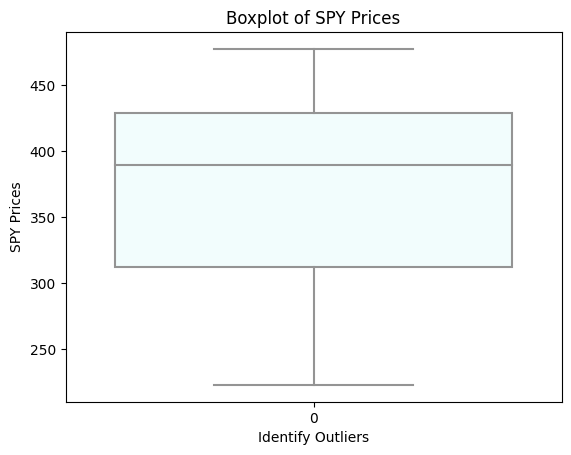

In [70]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of interest rate using seaborn
sns.boxplot(stock_market, color='azure')

# Add a title
plt.title("Boxplot of SPY Prices")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("SPY Prices")

# Show the plot
plt.show()

In [71]:
# I can calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [72]:
# Calculate the mean, median, and standard deviation for SPY
mean = stock_market.mean()
median = stock_market.median()
std = stock_market.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (stock_market - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "stock_market" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = stock_market[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: spy_closePrice, dtype: float64)


In [73]:
# There is no outliers for SPY in the z-scores method and boxplot.

In [74]:
# Repeat the same for interest_rate 

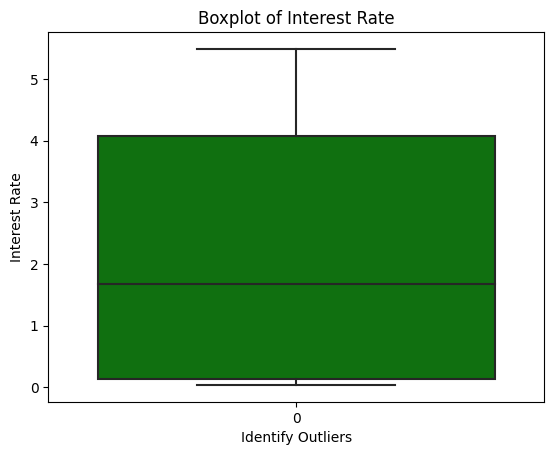

In [75]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of interest_rate using seaborn
sns.boxplot(interest_rate, color='green')

# Add a title
plt.title("Boxplot of Interest Rate")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Interest Rate")

# Show the plot
plt.show()

In [76]:
# Calculate the mean, median, and standard deviation
mean = interest_rate.mean()
median = interest_rate.median()
std = interest_rate.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (interest_rate - mean) / std

# Identify the outliers based on the threshold
outliers = interest_rate[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: daily_rate, dtype: float64)


In [77]:
# There is no outliers for interest rates in the z-scores method and boxplot.

In [78]:
# Repeat the same for inflation 

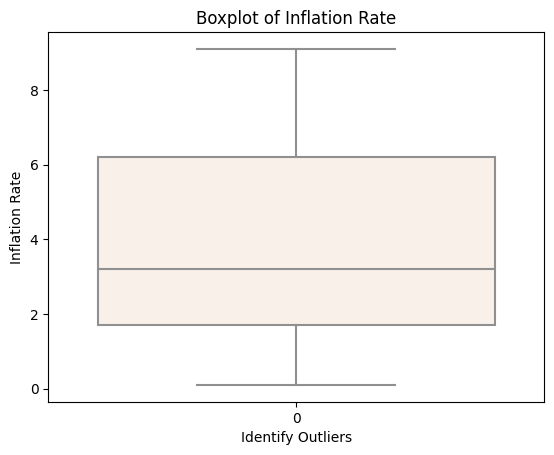

In [79]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of inflation using seaborn
sns.boxplot(infl, color='linen')

# Add a title
plt.title("Boxplot of Inflation Rate")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Inflation Rate")

# Show the plot
plt.show()

In [80]:
# Calculate the mean, median, and standard deviation
mean = infl.mean()
median = infl.median()
std = infl.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (infl - mean) / std

# Identify the outliers based on the threshold
outliers = infl[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: infl_value, dtype: float64)


In [81]:
# There is no outliers for inflation rates in the z-scores method and boxplot.

In [82]:
# Repeat the same for durable goods orders 

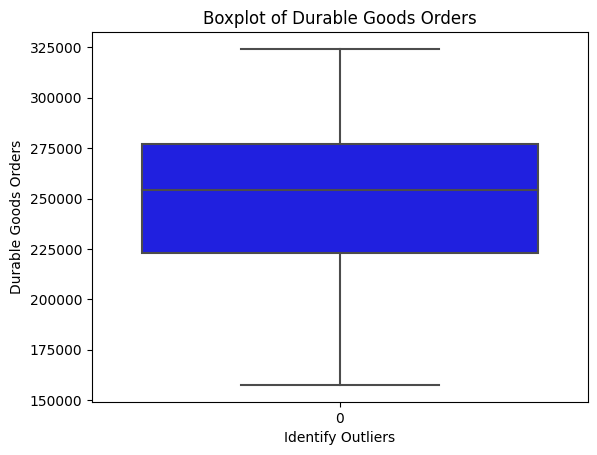

In [83]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of inflation using seaborn
sns.boxplot(dur, color='blue')

# Add a title
plt.title("Boxplot of Durable Goods Orders")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Durable Goods Orders")

# Show the plot
plt.show()

In [84]:
# Calculate the mean, median, and standard deviation
mean = dur.mean()
median = dur.median()
std = dur.std()

# Define the threshold for outliers 
threshold = 3

# Calculate the z-scores for each data point
# which is set to more than 3 standard deviations away from the mean 
z_scores = (dur - mean) / std

# Identify the outliers based on the threshold
outliers = dur[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
Series([], Name: dur_value, dtype: float64)


In [85]:
# There is no outliers for durable goods orders in the z-scores method and boxplot.

## Normal Distribution Analysis

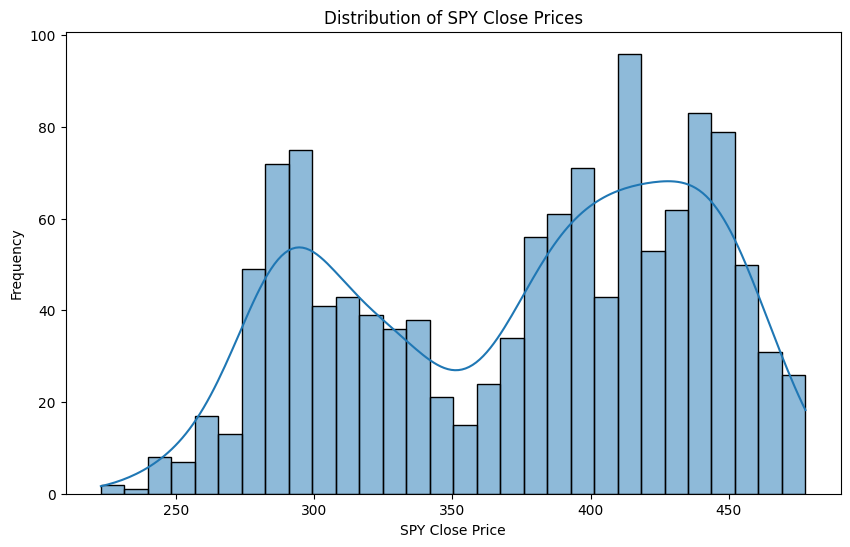

Mean: 374.6027851625201
Median: 389.6650085449219
Standard Deviation: 63.15954407949499
Skewness: -0.2923950889966452
Kurtosis: -1.2269433943266133
Shapiro-Wilk Test (W-statistic): 0.9351595640182495, p-value: 7.40904157526454e-23
Kolmogorov-Smirnov Test (statistic): 1214.595706662831, p-value: 1.7942932629115117e-264


In [86]:
# Import few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest

# Subset the data 
closing_prices = df['spy_closePrice']

# Convert to a pandas Series for easier analysis
closing_prices_series = pd.Series(closing_prices)

# Descriptive Statistics
mean = closing_prices_series.mean()
median = closing_prices_series.median()
std_dev = closing_prices_series.std()
skewness = closing_prices_series.skew()
kurtosis = closing_prices_series.kurtosis()

# Visual Inspection
plt.figure(figsize=(10, 6))
sns.histplot(closing_prices_series, bins=30, kde=True)
plt.title('Distribution of SPY Close Prices')
plt.xlabel('SPY Close Price')
plt.ylabel('Frequency')
plt.show()

# Statistical Tests
shapiro_test_stat, shapiro_p_value = shapiro(closing_prices_series)
ks_test_stat, ks_p_value = normaltest(closing_prices_series)

# Display the result
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Shapiro-Wilk Test (W-statistic): {shapiro_test_stat}, p-value: {shapiro_p_value}")
print(f"Kolmogorov-Smirnov Test (statistic): {ks_test_stat}, p-value: {ks_p_value}")

In [87]:
# Mean: This is the average value of the dataset. In this case, it's approximately 374.91.

# Median: The median is the middle value of the dataset when it is sorted in ascending order. 
# It's often used as a measure of central tendency, especially when the dataset contains outliers. 
# Here, it's approximately 389.80.

# Standard Deviation: This measures the dispersion or spread of the dataset around the mean. 
# A higher standard deviation indicates greater variability in the data. In this case, it's approximately 62.93.

# Skewness: Skewness measures the asymmetry of the distribution of values. 
# A negative skewness value indicates that the distribution is skewed to the left (long tail on the left side of the distribution). 
# Here, it's approximately -0.29, suggesting a slight left skew.

# Kurtosis: Kurtosis measures the "peakedness" or "flatness" of the distribution compared to a normal distribution. 
# A negative kurtosis value (as seen here) indicates a distribution that is slightly flatter than a normal distribution.

# Shapiro-Wilk Test: This is a test of normality. The W-statistic (0.9347) is a test statistic, 
# and the p-value (6.80e-23) is the probability of observing the data if the null hypothesis (that the data is normally distributed) is true. 
# A low p-value suggests that the null hypothesis can be rejected, indicating that the data is not normally distributed.

# Kolmogorov-Smirnov Test: This is also a test of normality, 
# but it's based on the maximum difference between the empirical distribution function of the sample and 
# the cumulative distribution function of the reference distribution (in this case, a normal distribution). 
# The statistic (1246) and p-value (2.72e-271) provide similar information to the Shapiro-Wilk test.

# Overall, these numbers provide insights into the central tendency, spread, shape, and normality of the dataset. 
# They are essential for understanding the characteristics of the data and for making informed decisions about further analysis.

## Time Series Plots Analysis

In [88]:
# Import few libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

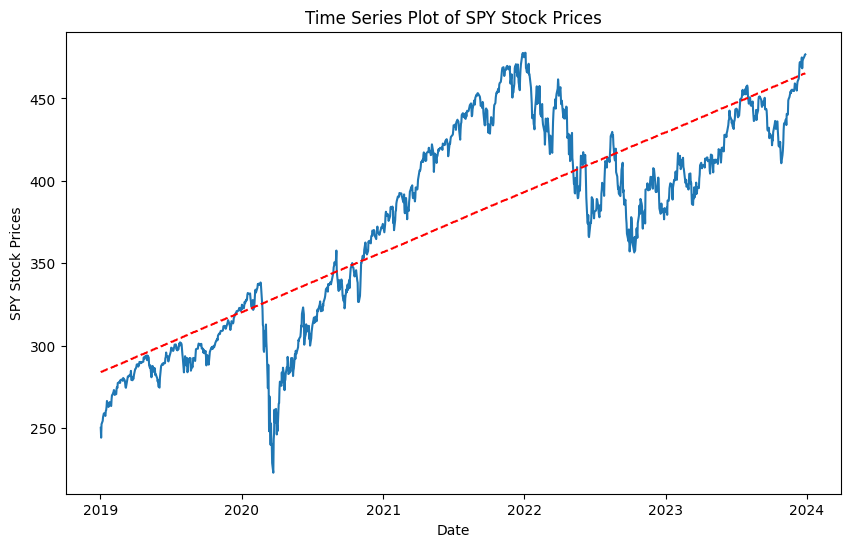

In [89]:
# Convert the 'Date' column in the DataFrame 'final_df' to datetime format using the pd.to_datetime() function
df['Date'] = pd.to_datetime(df['Date'], unit='ns')

# Create a new figure with a specified size using the plt.figure() function from the matplotlib.pyplot library. 
# The figsize parameter determines the width and height of the figure in inches.
plt.figure(figsize=(10, 6))

# Plot a line graph using the 'Date' column as the x-axis and the 'tm_closePrice' column as the y-axis. 
# It visualizes the time series of Toyota stock prices over the specified period, 2019-2024.
plt.plot(df['Date'], df['spy_closePrice'])

# Calculate the slope
z = np.polyfit(range(len(df)), df['spy_closePrice'], 1)
p = np.poly1d(z)

# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')

# Set the x-axis label of the plot as 'Date'
plt.xlabel('Date')

# Set the y-axis label of the plot as 'Apple Stock Price'
plt.ylabel('SPY Stock Prices')

# Set the title of the plot as 'Time Series Plot of Apple Stock Prices'
plt.title('Time Series Plot of SPY Stock Prices')

# Display the plot.
plt.show()

In [90]:
# I can visualize the historical trends and fluctuations in SPY stock prices over time. 
# The slope of this plot is positive, indicating an upward trend.
# The plot helps to identify patterns, and overall movements in the stock price, 
# providing insights into the historical performance of SPY stock performance.

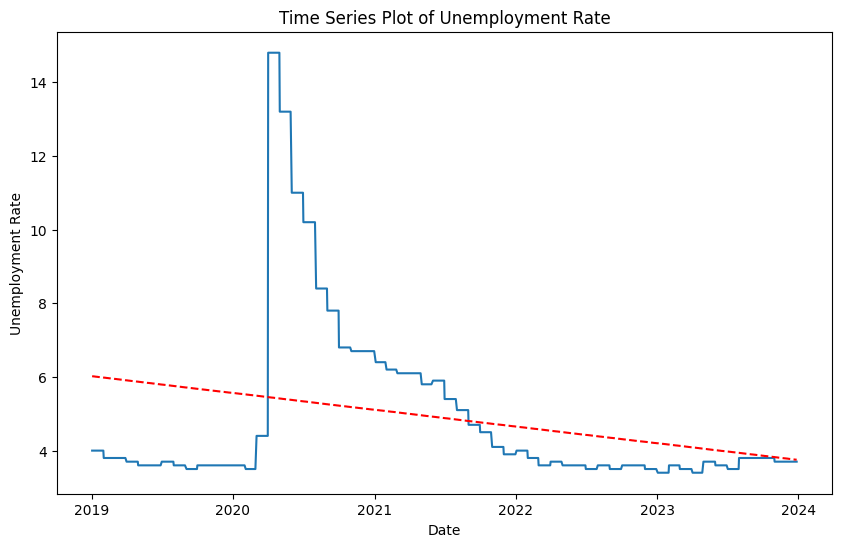

In [91]:
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['unemp_value'])
# Calculate the slope
z = np.polyfit(range(len(df)), df['unemp_value'], 1)
p = np.poly1d(z)
# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Time Series Plot of Unemployment Rate')
plt.show()

In [92]:
# The Time Series Plot of Unemployment Rate has a negative slope, indicating a downward trend. As time goes by, the unemployment rates drop.

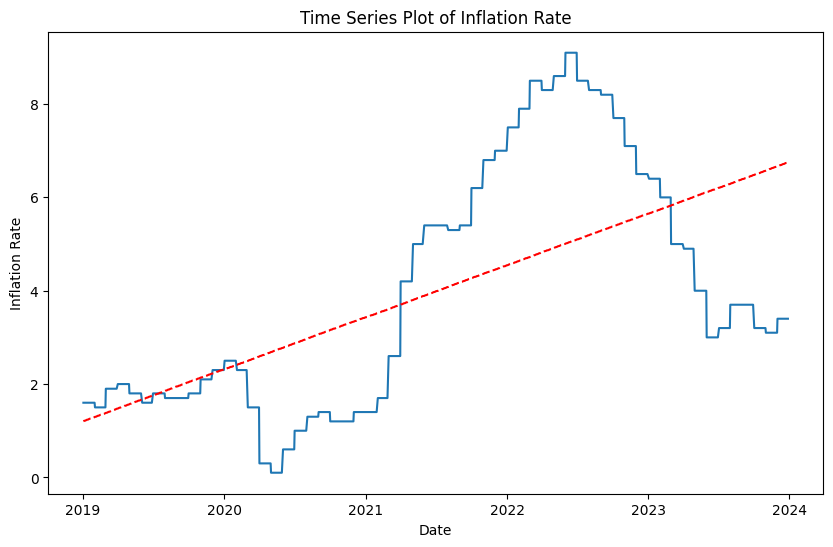

In [93]:
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['infl_value'])
# Calculate the slope
z = np.polyfit(range(len(df)), df['infl_value'], 1)
p = np.poly1d(z)
# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Time Series Plot of Inflation Rate')
plt.show()

In [94]:
# The Time Series Plot of Inflation Rate has a positive slope, indicating an upward trend.

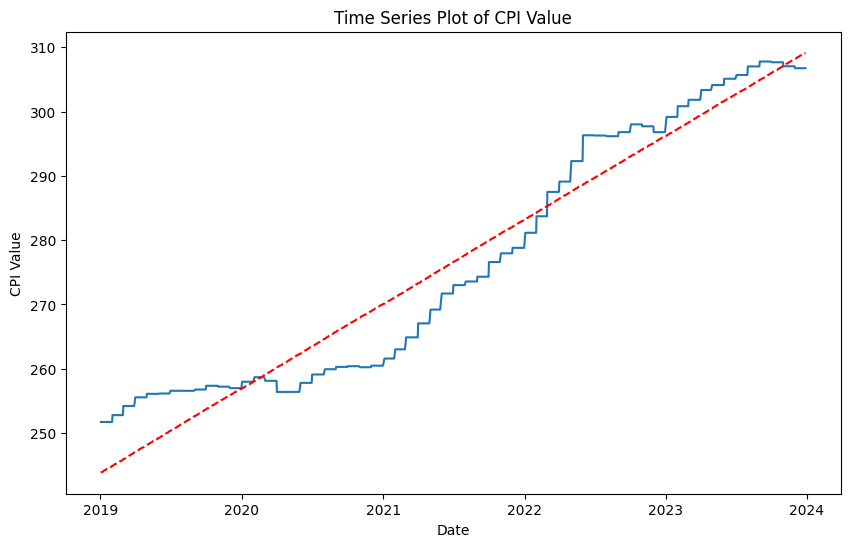

In [95]:
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['cpi_value'])
# Calculate the slope
z = np.polyfit(range(len(df)), df['cpi_value'], 1)
p = np.poly1d(z)
# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.title('Time Series Plot of CPI Value')
plt.show()

In [96]:
# The Time Series Plot of CPI values has a positive slope, indicating an upward trend.

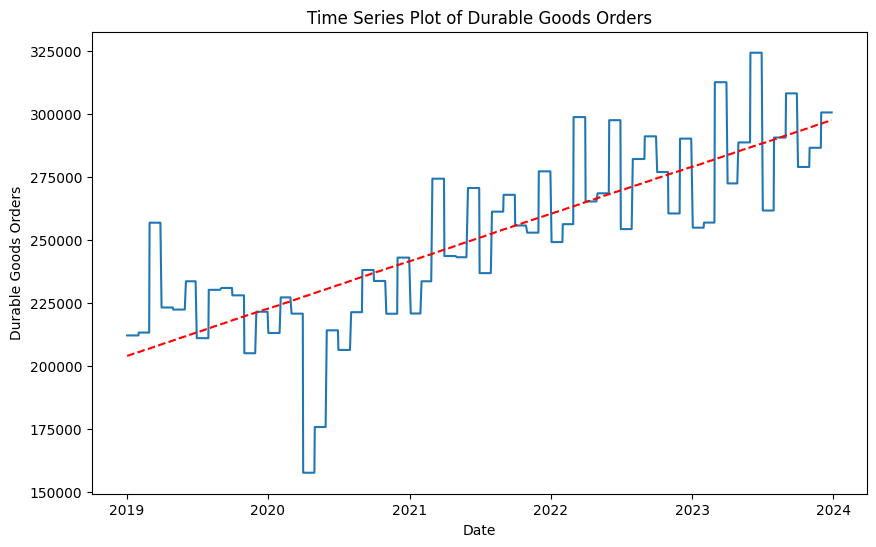

In [97]:
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['dur_value'])
# Calculate the slope
z = np.polyfit(range(len(df)), df['dur_value'], 1)
p = np.poly1d(z)
# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Durable Goods Orders')
plt.title('Time Series Plot of Durable Goods Orders')
plt.show()

In [98]:
# The Time Series Plot of Durable Goods Orders has a positive slope, indicating an upward trend.

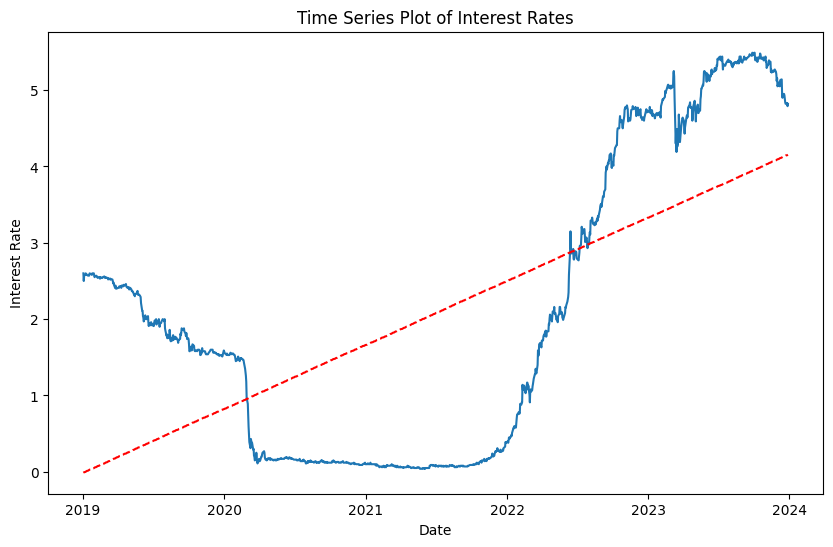

In [99]:
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['daily_rate'])
# Calculate the slope
z = np.polyfit(range(len(df)), df['daily_rate'], 1)
p = np.poly1d(z)
# Plot the slope
plt.plot(df['Date'], p(range(len(df))), linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Time Series Plot of Interest Rates')
plt.show()

In [100]:
# The Time Series Plot of Interest Rates has a positive slope, indicating an upward trend.

## Correlation Heatmap

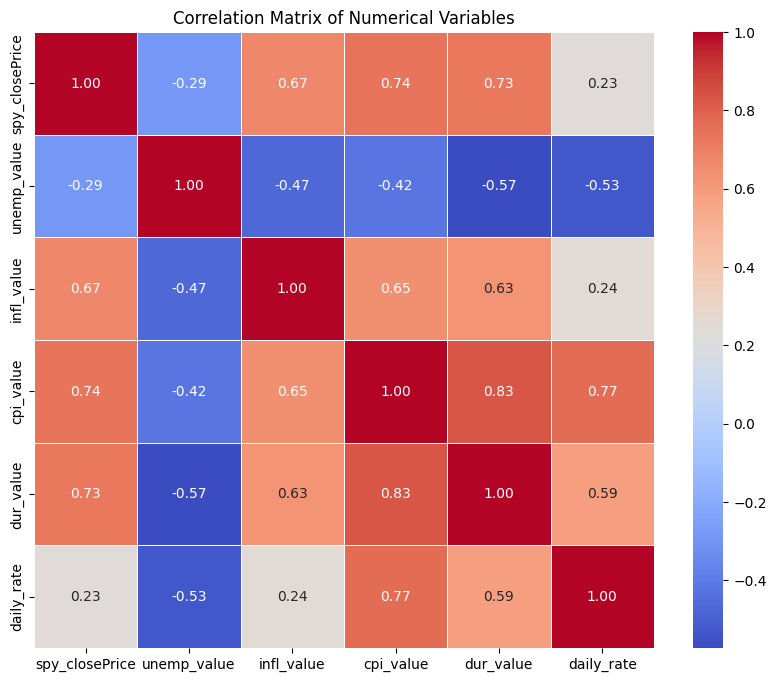

In [101]:
# Select numerical columns for correlation analysis
numerical_columns = ['spy_closePrice', 'unemp_value', 'infl_value', 'cpi_value', 'dur_value', 'daily_rate']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [102]:
# The heatmap helps to identify the relationships and dependencies between variables. 
# Positive correlations are indicated by red/light red color, while negative correlations are indicated by blue/light blue color. 
# The correlation coefficients displayed on the heatmap provide a numerical measure of the strength and direction of the correlations.

# The correlation between SPY and Inflation is positive, meaning, as the SPY increases, the inflation increases.
# The correlation between SPY and unemployment is negative, meaning, as the SPY increases, the unemployment decreases.
# The correlation between SPY and CPI is positive, meaning, as the SPY increases, the CPI increases.
# The correlation between SPY and durable goods is positive, meaning, as the SPY increases, the durable goods increases.
# The correlation between SPY and Rate is positive, meaning, as the SPY increases, the Rate increases.

## Scatter Plot SPY Vs. Unemployment 

In [103]:
# Subset the data for the variables of interest rate, SPY, unemployment,
# inflation, durable goods orders, and CPI values
interest_rate = df['daily_rate']
stock_market = df['spy_closePrice']
unemp = df['unemp_value']
infl = df['infl_value']
dur = df['dur_value']
cpi = df['cpi_value']

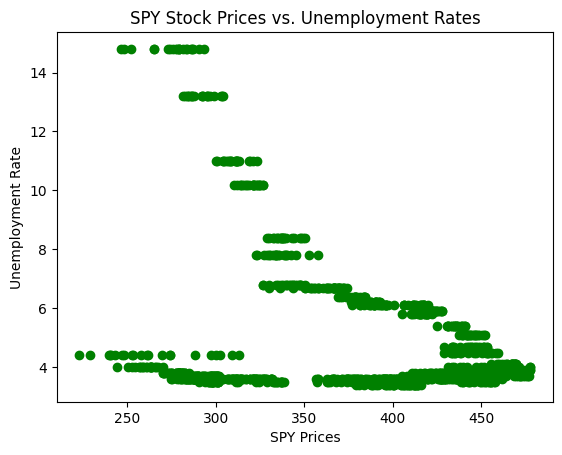

In [104]:
# Import matplotlib library
import matplotlib.pyplot as plt

# SPY Vs. Unemployment
# SPY represents the x-axis values, and unemploymentt represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the SPY, and the y-coordinate corresponds to the unemployment.
plt.scatter(stock_market, unemp, color='g')
# Set the label for the x-axis as "SPY stock prices"
plt.xlabel('SPY Prices')
# Set the label for the y-axis as "Unemployment."
plt.ylabel('Unemployment Rate')
# Set the title of the scatter plot as "SPY vs. Unemployment."
plt.title('SPY Stock Prices vs. Unemployment Rates')
# Display the plot
plt.show()

## Scatter Plot SPY Vs. Interest Rate

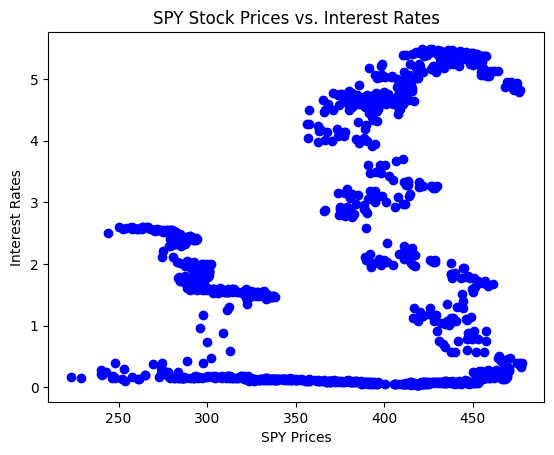

In [105]:
# Import matplotlib library
import matplotlib.pyplot as plt

# SPY Vs. Rate
# SPY represents the x-axis values, and rate represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the SPY, and the y-coordinate corresponds to the rate.
plt.scatter(stock_market, interest_rate, color='blue')
# Set the label for the x-axis as "SPY stock prices"
plt.xlabel('SPY Prices')
# Set the label for the y-axis as "Interest Rate."
plt.ylabel('Interest Rates')
# Set the title of the scatter plot as "SPY vs. Interest rate."
plt.title('SPY Stock Prices vs. Interest Rates')
# Display the plot
plt.show()

## Scatter Plot SPY Vs. Inflation Rate

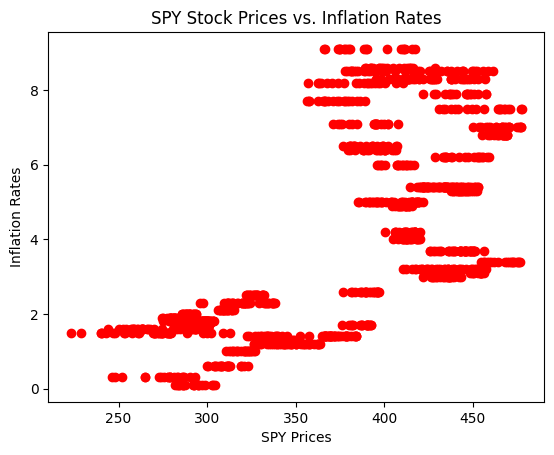

In [106]:
# Import matplotlib library
import matplotlib.pyplot as plt

# SPY Vs. Inflation
# SPY represents the x-axis values, and inflation represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the SPY, and the y-coordinate corresponds to the inflation.
plt.scatter(stock_market, infl, color='red')
# Set the label for the x-axis as "SPY stock prices"
plt.xlabel('SPY Prices')
# Set the label for the y-axis as "Inflation Rate."
plt.ylabel('Inflation Rates')
# Set the title of the scatter plot as "SPY vs. Inflation rate."
plt.title('SPY Stock Prices vs. Inflation Rates')
# Display the plot
plt.show()

## Scatter Plot SPY Vs. Durable Goods Orders

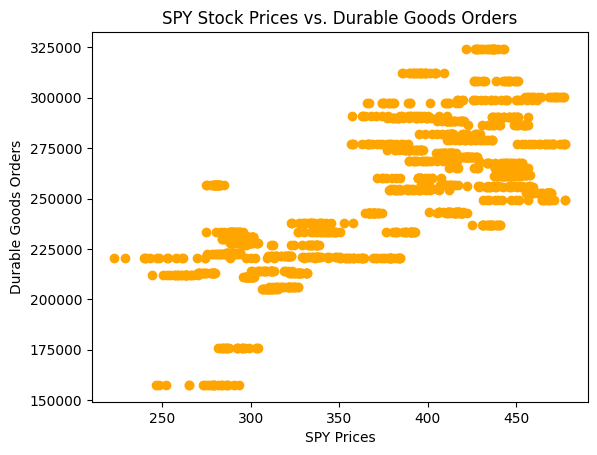

In [107]:
# Import matplotlib library
import matplotlib.pyplot as plt

# SPY Vs. Durable Goods
# SPY represents the x-axis values, and durable goods represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the SPY, and the y-coordinate corresponds to the durable goods.
plt.scatter(stock_market, dur, color='orange')
# Set the label for the x-axis as "SPY stock prices"
plt.xlabel('SPY Prices')
# Set the label for the y-axis as "Durable Goods Orders."
plt.ylabel('Durable Goods Orders')
# Set the title of the scatter plot as "SPY vs. Durable Goods Orders."
plt.title('SPY Stock Prices vs. Durable Goods Orders')
# Display the plot
plt.show()

## Scatter Plot SPY Vs. CPI

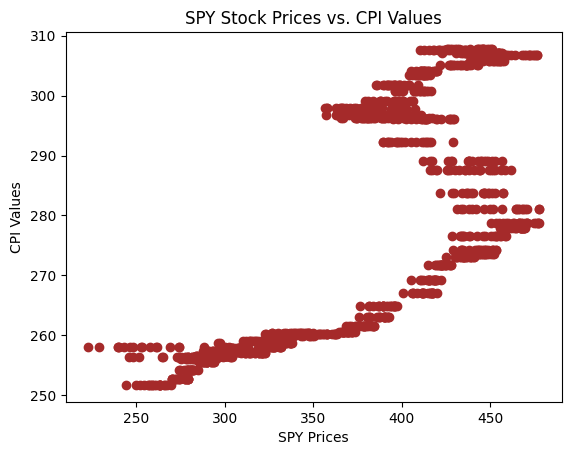

In [108]:
# Import matplotlib library
import matplotlib.pyplot as plt

# SPY Vs. Inflation
# SPY represents the x-axis values, and CPI represents the y-axis values. 
# Each data point is represented as a single point on the plot, 
# where the x-coordinate corresponds to the SPY, and the y-coordinate corresponds to the CPI.
plt.scatter(stock_market, cpi, color='brown')
# Set the label for the x-axis as "SPY stock prices"
plt.xlabel('SPY Prices')
# Set the label for the y-axis as "CPI."
plt.ylabel('CPI Values')
# Set the title of the scatter plot as "SPY vs. CPI."
plt.title('SPY Stock Prices vs. CPI Values')
# Display the plot
plt.show()

## Analyze their relationships

In [109]:
# Import few libraries
import pandas as pd
import numpy as np

# Calculate the covariance and Pearson's correlation coefficients for the two pairs of variables.

# This line calculates the covariance between the SPY and unemployment variables using the cov() function from NumPy. 
# The cov() function returns a covariance matrix, and I select the value at index [0][1] 
# to obtain the covariance between the two variables.
spy_unemp_cov = np.cov(stock_market,unemp)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and unemployment variables 
# using the corrcoef() function from NumPy. 
# The corrcoef() function returns a correlation matrix, and I select the value at index [0][1] 
# to obtain the correlation coefficient between the two variables.
spy_unemp_corr = np.corrcoef(stock_market, unemp)[0][1]

# This line calculates the covariance between the SPY and Inflation variables in the same way as explained above.
spy_infl_cov = np.cov(stock_market, infl)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and 
# Inflation variables in the same way as explained above.
spy_infl_corr = np.corrcoef(stock_market, infl)[0][1]

# This line calculates the covariance between the SPY and interest_rate variables in the same way as explained above.
spy_rate_cov = np.cov(stock_market, interest_rate)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and 
# interest_rate in the same way as explained above.
spy_rate_corr = np.corrcoef(stock_market, interest_rate)[0][1]

# This line calculates the covariance between the SPY and Durable Goods Orders variables in the same way as explained above.
spy_dur_cov = np.cov(stock_market, dur)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and 
# Durable Goods Orders variables in the same way as explained above.
spy_dur_corr = np.corrcoef(stock_market, dur)[0][1]

# This line calculates the covariance between the SPY and CPI variables in the same way as explained above.
spy_cpi_cov = np.cov(stock_market, cpi)[0][1]

# This line calculates the Pearson's correlation coefficient between the SPY and 
# CPI variables in the same way as explained above.
spy_cpi_corr = np.corrcoef(stock_market, cpi)[0][1]

# Print the covariance and Pearson's correlation coefficients
print(f'SPY and Unemployment: Covariance = {spy_unemp_cov:.2f}, Pearson\'s Correlation = {spy_unemp_corr:.2f}')
print(f'SPY and Rates: Covariance = {spy_rate_corr:.2f}, Pearson\'s Correlation = {spy_rate_corr:.2f}')
print(f'SPY and Inflation: Covariance = {spy_infl_cov:.2f}, Pearson\'s Correlation = {spy_infl_corr:.2f}')
print(f'SPY and Durable Goods: Covariance = {spy_dur_cov:.2f}, Pearson\'s Correlation = {spy_dur_corr:.2f}')
print(f'SPY and CPI: Covariance = {spy_cpi_cov:.2f}, Pearson\'s Correlation = {spy_cpi_corr:.2f}')

SPY and Unemployment: Covariance = -43.06, Pearson's Correlation = -0.29
SPY and Rates: Covariance = 0.23, Pearson's Correlation = 0.23
SPY and Inflation: Covariance = 111.13, Pearson's Correlation = 0.67
SPY and Durable Goods: Covariance = 1552039.87, Pearson's Correlation = 0.73
SPY and CPI: Covariance = 914.70, Pearson's Correlation = 0.74


In [110]:
# Covariance measures the linear relationship between two variables and provides information about 
# the direction and magnitude of their association. A positive covariance indicates a positive relationship, 
# while a negative covariance indicates a negative relationship.

# Pearson's correlation coefficient is a standardized measure of the linear relationship between two variables. 
# It ranges from -1 to +1, with values closer to +1 indicating a strong positive correlation, 
# values closer to -1 indicating a strong negative correlation, 
# and values close to 0 indicating little or no linear correlation.

# Analyzing the scatter plots, I can gain insights into the correlation and potential causation between the two variables.

# 1st scatter plot: I can see that there is a negative correlation between SPY and the Unemployment. 
# As stock market index increases, the unemployment tends to decreases.

# 2nd scatter plot: I can see that there is a weak positive correlation of 0.23 between SPY and Interest Rate.
# It suggests a weak positive linear relationship.

# 3rd scatter plot: I can see that there is a positive correlation between SPY and Inflation. 
# As SPY increases, inflation tends to increase.

# 4th scatter plot: I can see that there is a positive correlation between SPY and Durable Goods Orders. 
# As SPY increases, durable goods orders tends to increase.

# 5th scatter plot: I can see that there is a positive correlation between SPY and CPI. 
# As SPY increases, CPI tends to increase.

In [111]:
df.head()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,Date,daily_rate
0,0,250.179993,0,4.0,1.6,251.712,212040.0,1,2019-01-02,2.60
1,1,244.210007,1,4.0,1.6,251.712,212040.0,2,2019-01-03,2.50
2,2,252.389999,1,4.0,1.6,251.712,212040.0,3,2019-01-04,2.57
3,3,254.380005,1,4.0,1.6,251.712,212040.0,4,2019-01-07,2.58
4,4,256.769989,1,4.0,1.6,251.712,212040.0,5,2019-01-08,2.60


## Drop features that are not useful

In [112]:
# I would drop the following features:

# 1.Date: Since I have already used the 'Date' feature to plot the time series. I may not need it for model building.

# 2.Id: It does not provide any meaningful information related to the target variable or the other features.

df.drop(['Date', 'Id'],axis=1, inplace=True)

In [113]:
df.head()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,daily_rate
0,0,250.179993,0,4.0,1.6,251.712,212040.0,2.60
1,1,244.210007,1,4.0,1.6,251.712,212040.0,2.50
2,2,252.389999,1,4.0,1.6,251.712,212040.0,2.57
3,3,254.380005,1,4.0,1.6,251.712,212040.0,2.58
4,4,256.769989,1,4.0,1.6,251.712,212040.0,2.60


## Create/add new lag features

In [114]:
# Define the number of lag features
num_lags = 3

# Create lag features
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['spy_closePrice'].shift(i)

# Drop rows with NaN values resulting from shifting
df.dropna(inplace=True)

# Print the updated DataFrame with lag features
df.head()

,Unnamed: 0,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,daily_rate,lag_1,lag_2,lag_3
3,3,254.380005,1,4.0,1.6,251.712,212040.0,2.58,252.389999,244.210007,250.179993
4,4,256.769989,1,4.0,1.6,251.712,212040.0,2.60,254.380005,252.389999,244.210007
5,5,257.970001,1,4.0,1.6,251.712,212040.0,2.59,256.769989,254.380005,252.389999
6,6,258.880005,1,4.0,1.6,251.712,212040.0,2.59,257.970001,256.769989,254.380005
7,7,258.980011,0,4.0,1.6,251.712,212040.0,2.58,258.880005,257.970001,256.769989


## Store feature Matrix in X and Response (target) in vector y

In [115]:
# The drop() method in Pandas is used to remove columns from a DataFrame. 
# In this case, it drops the column named 'spy_closePrice' from the DataFrame df. 
# The parameter axis=1 indicates that I want to drop a column 
# Assign the resulting DataFrame after dropping the column 'spy_closePrice' to the variable X. 
# X now contains all the features (independent variables) for the machine learning model.
X=df.drop(['spy_closePrice'], axis=1)

# Display the independent features
X

,Unnamed: 0,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,daily_rate,lag_1,lag_2,lag_3
3,3,1,4.0,1.6,251.712,212040.0,2.58,252.389999,244.210007,250.179993
4,4,1,4.0,1.6,251.712,212040.0,2.60,254.380005,252.389999,244.210007
5,5,1,4.0,1.6,251.712,212040.0,2.59,256.769989,254.380005,252.389999
6,6,1,4.0,1.6,251.712,212040.0,2.59,257.970001,256.769989,254.380005
7,7,0,4.0,1.6,251.712,212040.0,2.58,258.880005,257.970001,256.769989
...,...,...,...,...,...,...,...,...,...,...
1241,1241,1,3.7,3.4,306.746,300534.0,4.84,468.260010,474.839996,471.970001
1242,1242,1,3.7,3.4,306.746,300534.0,4.82,472.700012,468.260010,474.839996
1243,1243,1,3.7,3.4,306.746,300534.0,4.83,473.649994,472.700012,468.260010
1244,1244,1,3.7,3.4,306.746,300534.0,4.79,475.649994,473.649994,472.700012


In [116]:
# Select the target variable (or dependent variable) 'spy_closePrice' from the DataFrame df.
y = df['spy_closePrice']

# Display the dependent target
y

3       254.380005
4       256.769989
5       257.970001
6       258.880005
7       258.980011
           ...    
1241    472.700012
1242    473.649994
1243    475.649994
1244    476.510010
1245    476.690002
Name: spy_closePrice, Length: 1243, dtype: float64

## Normalization

In [117]:
# Import MinMaxScaler for scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class, which will be used to perform feature scaling.
sc = MinMaxScaler()
# scaler.fit_transform(...): The fit_transform method of the MinMaxScaler class is used to perform feature scaling 
# on the independent features. 
# The fit_transform method first fits the scaler to the data to compute the minimum and maximum values for each feature, 
# and then it transforms the data using the computed minimum and maximum values to scale the data.
scaling_X = sc.fit_transform(X)
# Show feature scaling
scaling_X

array([[0.00000000e+00, 1.00000000e+00, 5.26315789e-02, ...,
        1.15559755e-01, 8.34511314e-02, 1.06884897e-01],
       [8.05152979e-04, 1.00000000e+00, 5.26315789e-02, ...,
        1.23371050e-01, 1.15559755e-01, 8.34511314e-02],
       [1.61030596e-03, 1.00000000e+00, 5.26315789e-02, ...,
        1.32752366e-01, 1.23371050e-01, 1.15559755e-01],
       ...,
       [9.98389694e-01, 1.00000000e+00, 2.63157895e-02, ...,
        9.84063441e-01, 9.80334513e-01, 9.62906336e-01],
       [9.99194847e-01, 1.00000000e+00, 2.63157895e-02, ...,
        9.91913968e-01, 9.84063441e-01, 9.80334513e-01],
       [1.00000000e+00, 0.00000000e+00, 2.63157895e-02, ...,
        9.95289756e-01, 9.91913968e-01, 9.84063441e-01]])

In [118]:
import numpy as np

# Repeat the same for the dependent feature
sc1 = MinMaxScaler()
y_reshape = y.values.reshape(-1,1)
scaling_y = sc1.fit_transform(y_reshape)
scaling_y = np.ravel(scaling_y)
scaling_y

array([0.12337105, 0.13275237, 0.13746273, ..., 0.99191397, 0.99528976,
       0.99599627])

## Splitting the dataset into the training and testing subsets

In [119]:
# Import the train_test_split function from the scikit-learn library. 
# The train_test_split function is used to split datasets into training and testing subsets.
from sklearn.model_selection import train_test_split

# Call the train_test_split function and performs the dataset split.
# X: This is the feature matrix containing all the independent variables.
# y: This is the target variable, which contains the dependent variable to be predicted.
# test_size=0.2: 20% of the data will be used for testing, and 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
# X_train: This is the feature matrix for training, containing 80% of the data.
# X_test: This is the feature matrix for testing, containing 20% of the data.
# y_train: This is the target variable for training, corresponding to the 80% of the data used for training.
# y_test: This is the target variable for testing, corresponding to the 20% of the data used for testing.
X_train,X_test,y_train,y_test = train_test_split(scaling_X, scaling_y, test_size = 0.2, random_state=42)

## Import Models

In [120]:
# Import the LinearRegression class from the scikit-learn library. 
# LinearRegression is a simple and commonly used linear regression model. 
# It fits a linear equation to the input features to predict the target variable.
from sklearn.linear_model import LinearRegression

# Import the SVR class from the scikit-learn library. 
# SVR stands for Support Vector Regressor. 
# It is a regression model based on Support Vector Machines (SVM) that can handle non-linear relationships by using kernels to transform the data into higher dimensions.
from sklearn.svm import SVR

# Import the RandomForestRegressor class from the scikit-learn library. 
# RandomForestRegressor is an ensemble model based on decision trees. 
from sklearn.ensemble import RandomForestRegressor

# Import the XGBoost from scikit-Learn library
# XGB is a powerful machine learning algorithm used for regression tasks like regression and forecasting.
# It is based on gradient boosting, and known for its effectiveness in predicting continuous numeric values.
from xgboost import XGBRegressor

# Import the GradientBoostingRegressor class from the scikit-learn library. 
# GradientBoostingRegressor is another ensemble model that combines multiple weak learners (usually decision trees) in a sequential manner to build a strong predictive model.
from sklearn.ensemble import GradientBoostingRegressor

## Model Training

In [121]:
# Create an instance of the LinearRegression class and assigns it to the variable lr.
lr = LinearRegression()
# Fit the LinearRegression model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the linear regression model using the provided data.
lr.fit(X_train,y_train)

# Create an instance of the SVR class and assigns it to the variable svm.
# The SVR class represents a Support Vector Regressor, which is a type of Support Vector Machine (SVM) used for regression tasks.
svm = SVR()
# Fit the SVR model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Support Vector Regressor model using the provided data.
svm.fit(X_train,y_train)

# Create an instance of the RandomForestRegressor class and assigns it to the variable rf
rf = RandomForestRegressor()
# fFt the RandomForestRegressor model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Random Forest Regressor model using the provided data.
rf.fit(X_train, y_train)

# Create an instance of the XGBoostingRegressor class and assigns it to the variable xgb.
xgb = XGBRegressor()
# Fit the XGBoostingRegressor model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the XGBoosting Regressor model using the provided data.
xgb.fit(X_train, y_train)

# Create an instance of the GradientBoostingRegressor class and assigns it to the variable gbr.
gbr = GradientBoostingRegressor()
# Fit the GradientBoostingRegressor model to the training data. 
# The fit() method takes the feature matrix X_train and the target variable y_train as inputs and trains the Gradient Boosting Regressor model using the provided data.
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

## Prediction on Testing Data

In [122]:
# Use the trained linear regression model (lr) to make predictions on the test data X_test. 
# The predict() method of the LinearRegression class takes the test data as input and 
# returns the predicted target variable values (y_pred_lr) based on the learned linear relationship between the features and the target variable.
y_pred_lr = lr.predict(X_test)

# Use the trained Support Vector Regressor model (svm) to make predictions on the test data X_test. 
# The predict() method of the SVR class takes the test data as input and returns the predicted target variable values 
# (y_pred_svm) based on the learned relationship using Support Vector Regression.
y_pred_svm = svm.predict(X_test)

# Use the trained Random Forest Regressor model (rf) to make predictions on the test data X_test. 
# The predict() method of the RandomForestRegressor class takes the test data as input and returns 
# the predicted target variable values (y_pred_rf) based on the ensemble of decision trees learned during training.
y_pred_rf = rf.predict(X_test)

# Use the trained Gradient Boosting Regressor model (gbr) to make predictions on the test data X_test. 
# The predict() method of the GradientBoostingRegressor class takes the test data as input and returns 
# the predicted target variable values (y_pred_gbr) based on the ensemble of weak learners learned in a sequential manner during training.
y_pred_gbr = gbr.predict(X_test)

# Use the trained XGBoosting Regressor model (xgb) to make predictions on the test data X_test. 
# The predict() method of the XGBoostingRegressor class takes the test data as input and returns 
# the predicted target variable values (y_pred_xgb) based on the ensemble of XGBoosting.
y_pred_xgb = xgb.predict(X_test)

## Evaluate the Algorithms

In [123]:
# Import the metrics module from scikit-learn. 
from sklearn import metrics

# Calculate the R-squared (R2) score for the first regression(LR) model's predictions (y_pred_lr) compared to the actual target values (y_test). 
# The r2_score() function from the metrics module takes two arguments: the actual target values (y_test) and the predicted target values from the model (y_pred_lr). 
# It then returns the R2 score, which is a value between -1 and 1. 
# R2 score of 1 indicates that the model perfectly fits the data, 
# 0 indicates that the model's predictions are no better than guessing the mean of the target values, 
# and negative values indicate that the model's predictions are worse than guessing the mean.
score_lr = metrics.r2_score(y_test, y_pred_lr)

# Repeat the same for the second regression(SVM)
score_svm = metrics.r2_score(y_test, y_pred_svm)

# Repeat the same for the third regression(RF)
score_rf = metrics.r2_score(y_test, y_pred_rf)

# Repeat the same for the fourth regression(GB)
score_gbr = metrics.r2_score(y_test, y_pred_gbr)

# Repeat the same for the fifth regression(XGB)
score_xgb = metrics.r2_score(y_test, y_pred_xgb)

In [124]:
print(score_lr,score_svm,score_rf,score_gbr,score_xgb)

0.9939404891535549 0.9660802660862061 0.9935786419610381 0.994242845745608 0.9933815126540053


In [125]:
# Create a new Pandas DataFrame named df that contains multiple models and 
# the R2_score values from each model.

score_r2 = pd.DataFrame({'Models':['LR','SVR','RF','GBR','XGB'], 
                   'R2_score':[score_lr,score_svm,score_rf,score_gbr,score_xgb]})

In [126]:
# Display the result
final_df

,spy_closePrice,spy_Indication,unemp_value,infl_value,cpi_value,dur_value,Id,Date,daily_rate
0,250.179993,Up-day,4.0,1.6,251.712,212040.0,1,2019-01-02 00:00:00.000000,2.60
1,244.210007,Down-day,4.0,1.6,251.712,212040.0,2,2019-01-03 00:00:00.000000,2.50
2,252.389999,Down-day,4.0,1.6,251.712,212040.0,3,2019-01-04 00:00:00.000000,2.57
3,254.380005,Down-day,4.0,1.6,251.712,212040.0,4,2019-01-07 00:00:00.000000,2.58
4,256.769989,Down-day,4.0,1.6,251.712,212040.0,5,2019-01-08 00:00:00.000000,2.60
...,...,...,...,...,...,...,...,...,...
1241,472.700012,Down-day,3.7,3.4,306.746,300534.0,1244,2023-12-21 00:00:00.000000,4.84
1242,473.649994,Down-day,3.7,3.4,306.746,300534.0,1245,2023-12-22 00:00:00.000000,4.82
1243,475.649994,Down-day,3.7,3.4,306.746,300534.0,1246,2023-12-26 00:00:00.000000,4.83
1244,476.510010,Down-day,3.7,3.4,306.746,300534.0,1247,2023-12-27 00:00:00.000000,4.79


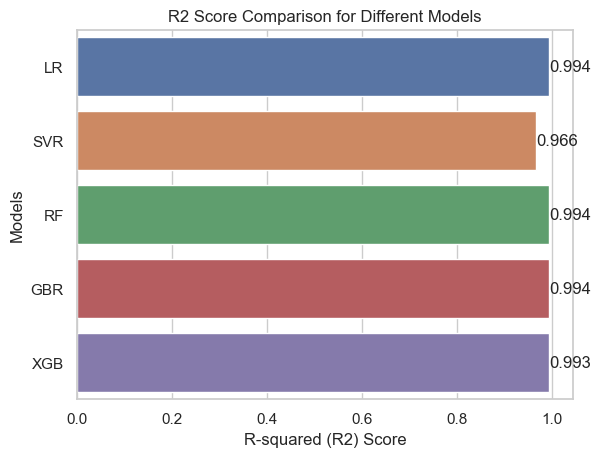

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='R2_score', y='Models', data=score_r2)

# Adding labels and title
plt.xlabel('R-squared (R2) Score')
plt.ylabel('Models')
plt.title('R2 Score Comparison for Different Models')

# Add text labels for each bar
for index, row in score_r2.iterrows():
    ax.text(row['R2_score'], index, f'{row["R2_score"]:.3f}', va='center')

# Display the plot
plt.show()

In [128]:
# GBR is the best performing model which has the highest R2 score, 99.43%.

In [129]:
# Using mean absolute error (MAE)

In [130]:
# Calculate the Mean Absolute Error (MAE) for the first regression(LR) model's predictions (y_pred_lr) compared to the actual target values (y_test). 
# The mean_absolute_error() function from the metrics module takes two arguments: the actual target values (y_test) and the predicted target values from the model (y_pred_lr). 
# It then returns the MAE, which is the average absolute difference between the actual target values and the predicted target values. 
# MAE measures the average magnitude of errors, regardless of their direction.
s_lr = metrics.mean_absolute_error(y_test, y_pred_lr)

# Repeat the same for the second regression(SVM)
s_svm = metrics.mean_absolute_error(y_test, y_pred_svm)

# Repeat the same for the third regression(RF)
s_rf = metrics.mean_absolute_error(y_test, y_pred_rf)

# Repeat the same for the forth regression(GBR)
s_gbr = metrics.mean_absolute_error(y_test, y_pred_gbr)

# Repeat the same for the fifth regression(XGB)
s_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)

In [131]:
# Print the result
# The MAE can be used to assess how well each model has performed in predicting the target variable (y_test). 
# A lower MAE indicates a better-performing model with smaller errors between predicted and actual values. 
print(s_lr,s_svm,s_rf,s_gbr,s_xgb)

0.013238109032109513 0.03751924774139259 0.014030733066182818 0.01345134277404924 0.014782698579975745


In [132]:
score_mae=pd.DataFrame({'Models':['LR','SVM','RF','GBR','XGB'],
             'MAE':[s_lr,s_svm,s_rf,s_gbr,s_xgb]})
score_mae

,Models,MAE
0,LR,0.013238
1,SVM,0.037519
2,RF,0.014031
3,GBR,0.013451
4,XGB,0.014783


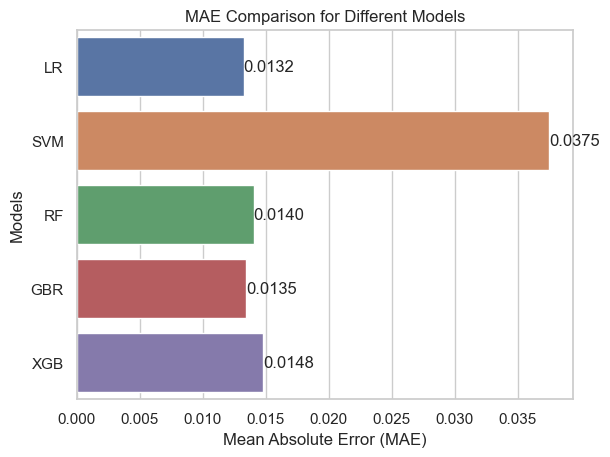

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='MAE', y='Models', data=score_mae)

# Adding labels and title
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Models')
plt.title('MAE Comparison for Different Models')

# Add text labels for each bar
for index, row in score_mae.iterrows():
    ax.text(row['MAE'], index, f'{row["MAE"]:.4f}', va='center')

# Display the plot
plt.show()

In [134]:
# Thus, the GBR model is the best model.

## Save model using joblib

In [135]:
# Since GBR is the best model, I create an instance of the GradientBoostingRegressor class and assigns it to the variable gbr.
gbr = GradientBoostingRegressor()
# Fit (trains) the GradientBoostingRegressor model to the entire dataset X and the corresponding target variable y. 
gbr.fit(X, y)

GradientBoostingRegressor()

In [136]:
# Import the joblib library
import joblib

# Save the trained GradientBoostingRegressor model (gbr) to a file named 'FinalProject_Model_in_Production'. 
# The dump() function from the joblib library is used to serialize the Python object (gbr - the trained model) to the file.
joblib.dump(gbr,'FinalProject_Model_in_Production')

['FinalProject_Model_in_Production']

In [137]:
# load the machine learning model stored in the file 'FinalProject_Model_in_Production' into memory and assigns it to the variable model.
model = joblib.load('FinalProject_Model_in_Production')

In [138]:
# I can now use this loaded model to make predictions on new data without the need to retrain the model.